# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [1]:
%pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm
from scipy.optimize import fsolve
import pandas as pd
from types import SimpleNamespace
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import parameters, duopoly_model, monopoly_model_extension, duopoly_model_extension

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

In [3]:
#Plotting the duopoly interactive graph showing the quantaties produced by the two firms given choosen parameters.
plot = duopoly_model(a=100, b=16, MC=4)
plot.interactive_plot()

interactive(children=(FloatSlider(value=100.0, description='a:', max=150.0, min=50.0, step=1.0), FloatSlider(v…

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [4]:
model = duopoly_model(a=100, b=16, MC=4)
print(model.solve_numerical())

[2.]


So our results above shows the quantity produced by each firm in equilibrium, the price in equilibrium, and the profit for both firms in equilibrium give the parameter values you choose.

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

We start by setting uo the duopoly situation, where we have MC = 0, and there is no cost function (set to zero)

In [5]:
# numerical analysis of the duopoly model extension
md_ex = duopoly_model_extension()
print(md_ex.solve_numerical_ex())

[2.08333333]


Based on the numerical analysis above, we find the quantity, price and profit for the extended version of the duopoly model.

In [6]:
model = duopoly_model_extension()
model.print_results(2.083,2.083)

Quantity produced by firm 1 in equilibrium: 2.0833333333333335
Quantity produced by firm 2 in equilibrium: 2.0833333333333335
Total quantity produced in equilibrium: 4.166666666666667
Price in equilibrium: 33.33333333333333
Profit for firm 1 in equilibrium: 69.455552
Profit for firm 2 in equilibrium: 69.455552


Now we consider the case of monopoly: 

In [7]:
# numerical analysis of the monopoly model extension
mon_ex = monopoly_model_extension()
print(mon_ex.solve_numerical_mon())

[3.125]


Based on the numerical analysis above, we solve for quantity, price and profit in the monopoly model.

In [8]:
mon_ex.print_results()

Quantity produced per firm: 1.5625
Total quantity produced:: 3.125
Price in equilibrium: 50.0
Profit per firm: [78.125]


We want to calculate CS and PS to further support our analysis for duopoly and monopoly:

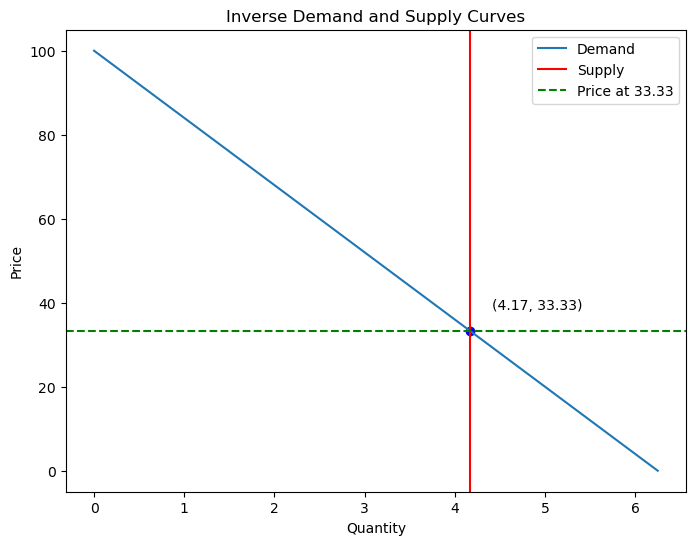

In [9]:
model.plot_duo()

In [10]:
model.consumer_surplus_duo()

138.89583333333334

In [11]:
model.producer_surplus_duo()

138.875

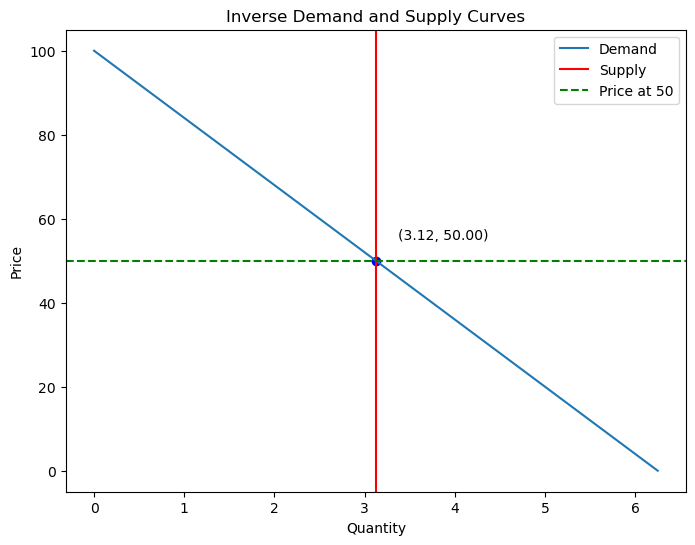

In [12]:
mon_ex.plot_mon()

In [13]:
mon_ex.consumer_surplus_mon()

78.125

In [14]:
mon_ex.producer_surplus_mon()

156.25

Now we summaries the analysis by showing quantity, price, profit, CS and PS for the case of duopoly and monopoly for our cases in the "furhter analysis" versions of our models.

In [27]:
duopoly_model_instance = duopoly_model_extension()  # create an instance of the duopoly model
monopoly_model_instance = monopoly_model_extension()  # create an instance of the monopoly model

# Now pass these instances to the print_results_table method
monopoly_model_instance.print_results_table(duopoly_model_instance, monopoly_model_instance)

+-------------------+-------------------------+--------------------------+
|                   | Duopoly Extension Model | Monopoly Extension Model |
+-------------------+-------------------------+--------------------------+
| Quantity Produced |          4.167          |          3.125           |
|       Price       |          33.333         |          50.000          |
|       Profit      |          69.456         |          78.125          |
|  Consumer Surplus |         138.896         |          78.125          |
|  Producer Surplus |         138.875         |         156.250          |
+-------------------+-------------------------+--------------------------+


# Conclusion

Add concise conclusion. 